In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\adult.csv")

# Understanding Data

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Find out Missing 

In [7]:
#total number of missing values per column
df=df.replace('?',np.NaN)
df.isnull().sum()


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
#total number of columns 
df.shape

(48842, 15)

In [9]:
#Percentage of missing value
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

### * 2799 - 5.73 % null values in 'workclass' column 
### * 2809 - 5.75 %null values in 'occupation' column
### * 457 - 1.75 % null values in 'native-country' column

<Figure size 720x432 with 0 Axes>

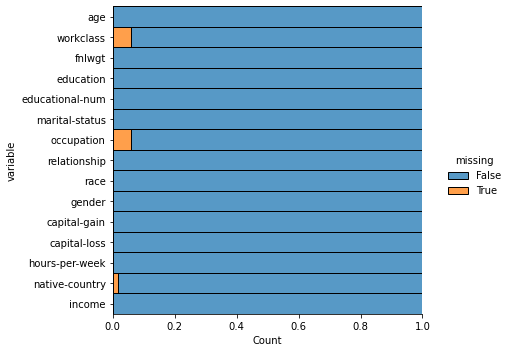

In [10]:
#visualization of missing data 
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)



# Handling Missing Values

In [11]:
#fill missing value with the most frequent value of the column
df=df.fillna(df.mode().iloc[0])
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
#To make sure there is no null value in data
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Remove Noise

Our purpose in this Step is to Remove Outliers And Smooth the data

In [13]:
#dectecting the outliers in each feature using boxplot
def boxplot(df,fn):#define a function called boxplot takes the data frame and feature name
    df.boxplot(column=[fn])
    plt.grid(False)
    plt.show()


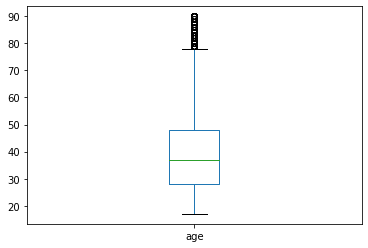

In [14]:
boxplot(df,"age")

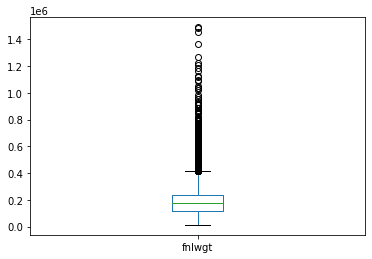

In [15]:
boxplot(df,"fnlwgt")


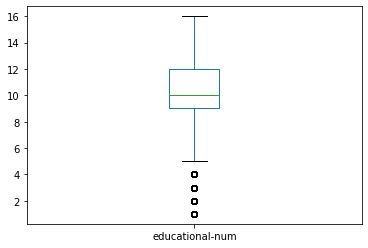

In [16]:
boxplot(df,"educational-num")

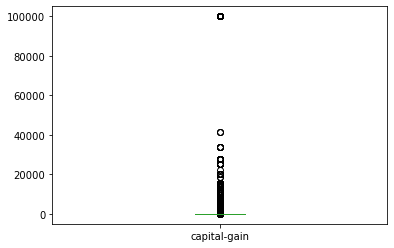

In [17]:
boxplot(df,"capital-gain")


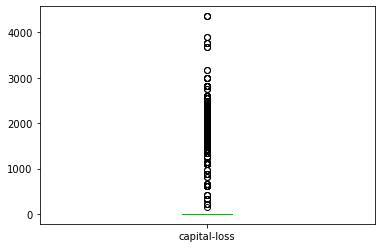

In [18]:
boxplot(df,"capital-loss")

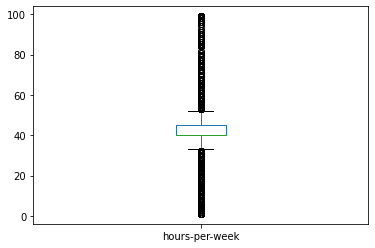

In [19]:
boxplot(df,"hours-per-week")


In [20]:
#define function called outliers which returns list of index(row) of outliers
def outliers(df,fn):
    Q1=df[fn].quantile(0.25)
    Q3=df[fn].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    list= df.index[ (df[fn]<lower_bound ) | (df[fn]>upper_bound) ]
    return list


In [21]:
#create an empty list to store the indices of outliers in it
indices=[]
for col in['educational-num','age']:
    indices.extend(outliers(df,col))

In [22]:
print(indices)


[9, 22, 37, 46, 91, 137, 152, 193, 206, 217, 323, 342, 347, 371, 420, 463, 476, 498, 515, 519, 540, 566, 590, 614, 637, 639, 715, 734, 770, 779, 818, 838, 853, 890, 929, 946, 961, 962, 969, 1013, 1029, 1058, 1059, 1063, 1079, 1091, 1094, 1103, 1109, 1133, 1134, 1156, 1174, 1186, 1235, 1279, 1309, 1321, 1331, 1334, 1339, 1390, 1394, 1398, 1406, 1466, 1489, 1498, 1511, 1532, 1562, 1577, 1584, 1602, 1658, 1664, 1668, 1723, 1775, 1834, 1857, 1858, 1861, 1894, 1898, 1952, 2000, 2002, 2023, 2028, 2034, 2037, 2073, 2076, 2138, 2200, 2203, 2229, 2364, 2369, 2399, 2401, 2410, 2465, 2510, 2553, 2566, 2598, 2654, 2661, 2709, 2772, 2786, 2843, 2848, 2872, 2884, 2920, 2939, 2970, 2979, 2982, 2983, 2991, 3036, 3037, 3038, 3052, 3086, 3117, 3129, 3144, 3168, 3175, 3177, 3220, 3341, 3348, 3416, 3497, 3507, 3515, 3540, 3552, 3568, 3580, 3655, 3698, 3723, 3732, 3757, 3809, 3849, 3866, 3908, 3934, 3956, 3972, 4005, 4032, 4045, 4053, 4062, 4093, 4102, 4170, 4191, 4228, 4237, 4264, 4283, 4308, 4409, 4420, 

In [23]:
#Trimming/Remove the outliers from column educational-num
#define a function called remove that return the data set without rows contains outliers in educational-num
def remove(df,list):
    list=sorted(set(list))#to make the list of indices sorted and unique
    df=df.drop(list)
    return df


In [24]:
df=remove(df,indices)

In [25]:
df.shape #the number of rows is reduced to 46872 after removing rows contains outliers

(46872, 15)

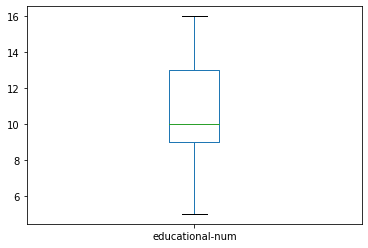

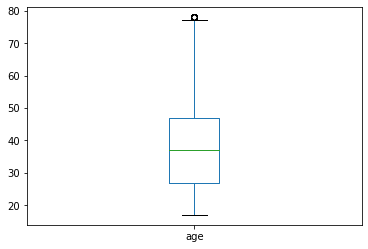

In [26]:
#the boxplot of educatinal-num after removing outliers from it
boxplot(df,"educational-num")
boxplot(df,"age")

In [27]:
#replacing the rest of outliers with median values
m1 = df['hours-per-week'].quantile(0.50) 
q1 = df['hours-per-week'].quantile(0.95) 
df['hours-per-week'] = np.where(df['hours-per-week'] >q1, m1, df['hours-per-week'])

m2 = df['fnlwgt'].quantile(0.50) 
q2 = df['fnlwgt'].quantile(0.95) 
df['fnlwgt'] = np.where(df['fnlwgt'] >q2, m2, df['fnlwgt'])

m3 = df['capital-gain'].quantile(0.50) 
q3 = df['capital-gain'].quantile(0.95) 
df['capital-gain'] = np.where(df['capital-gain'] >q3, m3, df['capital-gain'])

m4 = df['capital-loss'].quantile(0.50)
q4 = df['capital-loss'].quantile(0.95) 
df['capital-loss'] = np.where(df['capital-loss'] >q4, m4, df['capital-loss'])

In [28]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0.0,40.0,United-States,>50K
4,18,Private,103497.0,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [29]:
(df['age'] < 0).any()
(df['fnlwgt'] < 0).any()
(df['educational-num'] < 0).any()
(df['capital-gain'] < 0).any()
(df['capital-gain'] < 0).any()
(df['hours-per-week'] < 0).any()
#there are no negative values in the data set wich may cause noise in data

False

# Rermove duplicate records

In [30]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0.0,40.0,United-States,>50K
4,18,Private,103497.0,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


# Normalization

### by Min-Max scaler

Normalization refers to rescaling numeric attributes into the range 0 and 1


In [31]:
from sklearn.preprocessing import MinMaxScaler
#Transform features numerical by scaling each feature to a given range(0,1)
#MinMaxScaler() take range by defult(0,1)
scaler =MinMaxScaler()
numerical=["age","educational-num","capital-gain",'capital-loss','hours-per-week']
#For normalization,the training data will be used to estimate the minimum and maximum observable values by(fit()) 
#can use the normalized data to train your model by(transform())
#fit_transform() Fit to data, then transform it.
df[numerical]=scaler.fit_transform(df[numerical])
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.131148,Private,226802.0,11th,0.181818,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.661017,United-States,<=50K
1,0.344262,Private,89814.0,HS-grad,0.363636,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,0.830508,United-States,<=50K
2,0.180328,Local-gov,336951.0,Assoc-acdm,0.636364,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,0.661017,United-States,>50K
3,0.442623,Private,160323.0,Some-college,0.454545,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0.0,0.661017,United-States,>50K
4,0.016393,Private,103497.0,Some-college,0.454545,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,0.491525,United-States,<=50K


# Remove irrelevant attribute

# feature selection

there are two steps to make feature selection:

*if we get correlation between features and target attributes that the attribute which is highly correlated with target is more important (remove irrelevant attribute)

*If we get correlation between feature And them selves that the attributes with highly correlated we must remove one of them(correlated variables)
because this can behave like duplicated feature (remove correleted attribute)


# using pearson correlation

### convert categorical attribute to numerical

In [32]:
#importing OrdinalEncoder from sklearn used to transform categorical values
import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [33]:
enc.fit(df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income']])

OrdinalEncoder()

In [34]:
#Transforming and categorical values to numbers so we could apply correlation
df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income']]=enc.transform(df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income']])


In [35]:
#getting the correalatin between our target attribute "income" with other feature
#and sorting it in descending order
corr_matrix=abs(df.corr())
corr_matrix["income"].sort_values(ascending=False)


income             1.000000
educational-num    0.340747
relationship       0.260775
age                0.256212
hours-per-week     0.242660
gender             0.220917
marital-status     0.201358
race               0.071919
education          0.045429
occupation         0.033907
capital-gain       0.012811
native-country     0.004281
fnlwgt             0.002043
workclass          0.000676
capital-loss            NaN
Name: income, dtype: float64

In [36]:
#removing attribute that had the smallest correlation "capital loss"
df=df.drop(["capital-loss"],axis=1)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
0,8.0,3.0,18695.0,1.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,39.0,38.0,0.0
1,21.0,3.0,4067.0,8.0,4.0,2.0,4.0,0.0,4.0,1.0,0.0,49.0,38.0,0.0
2,11.0,1.0,24454.0,4.0,7.0,2.0,10.0,0.0,4.0,1.0,0.0,39.0,38.0,1.0
3,27.0,3.0,10790.0,11.0,5.0,2.0,6.0,0.0,2.0,1.0,0.0,39.0,38.0,1.0
4,1.0,3.0,5207.0,11.0,5.0,4.0,9.0,3.0,4.0,0.0,0.0,29.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10.0,3.0,20844.0,4.0,7.0,2.0,12.0,5.0,4.0,0.0,0.0,37.0,38.0,0.0
48838,23.0,3.0,10194.0,8.0,4.0,2.0,6.0,0.0,4.0,1.0,0.0,39.0,38.0,1.0
48839,41.0,3.0,9931.0,8.0,4.0,6.0,0.0,4.0,4.0,0.0,0.0,39.0,38.0,0.0
48840,5.0,3.0,16254.0,8.0,4.0,4.0,0.0,3.0,4.0,1.0,0.0,19.0,38.0,0.0


# remove correlated attribute

## what is correlation?

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other


## How does correlation help in feature selection?

Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

## using Pearson Correlation 

In [37]:
#between numerical attribute Using Pearson Correlation
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
age,1.000000,0.041173,-0.058294,0.014109,0.111925,-0.292310,-0.007615,-0.266949,0.034706,0.091815,0.044507,0.099712,-0.000773,0.256212
workclass,0.041173,1.000000,-0.028876,0.009983,0.018229,-0.020787,0.011313,-0.054238,0.052872,0.065741,-0.000068,0.005429,-0.005660,-0.000676
fnlwgt,-0.058294,-0.028876,1.000000,-0.007397,-0.012775,0.028631,0.004653,0.005638,-0.005311,0.019910,-0.005582,-0.000365,-0.046768,0.002043
education,0.014109,0.009983,-0.007397,1.000000,0.215842,-0.029101,-0.037319,-0.013364,0.011547,-0.019507,0.005054,0.044956,0.030652,0.045429
educational-num,0.111925,0.018229,-0.012775,0.215842,1.000000,-0.071505,0.087857,-0.127650,0.029865,0.031065,-0.001445,0.168176,-0.012105,0.340747
marital-status,-0.292310,-0.020787,0.028631,-0.029101,-0.071505,1.000000,0.030504,0.185489,-0.069501,-0.121219,-0.027016,-0.194592,-0.011612,-0.201358
occupation,-0.007615,0.011313,0.004653,-0.037319,0.087857,0.030504,1.000000,-0.037163,-0.003615,0.047003,-0.001624,-0.037743,-0.004175,0.033907
relationship,-0.266949,-0.054238,0.005638,-0.013364,-0.127650,0.185489,-0.037163,1.000000,-0.117589,-0.579294,-0.040345,-0.262709,-0.007196,-0.260775
race,0.034706,0.052872,-0.005311,0.011547,0.029865,-0.069501,-0.003615,-0.117589,1.000000,0.085716,0.011201,0.035971,0.128571,0.071919
gender,0.091815,0.065741,0.019910,-0.019507,0.031065,-0.121219,0.047003,-0.579294,0.085716,1.000000,0.026208,0.235534,-0.000432,0.220917


<AxesSubplot:>

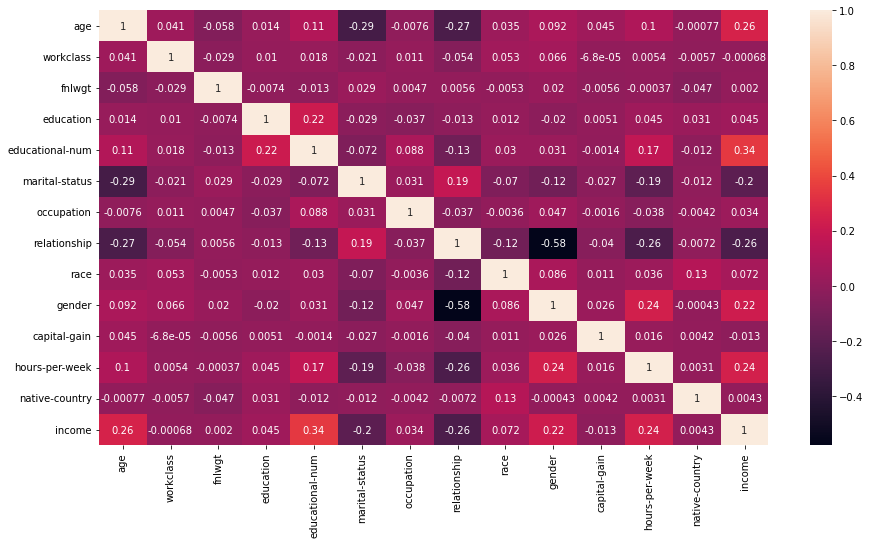

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

 we compare the correlation between features and remove one of two features that have a correlation higher than 0.8

In [39]:
# with the following function we can select highly correlated features

def correlation(dataset, corr_rate):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):#6
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > corr_rate: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

0

concl:there is no correlation attribute greater than .8

# Discretization
Data discretization is the process of converting continuous data into discrete buckets by grouping it.
Discretization is also known for easy maintainability of the data. Training a model with discrete data becomes faster and more effective than when attempting the same with continuous data.

In [41]:
df = pd.DataFrame(df) 
df['hours-per-week'].describe()

count    46872.000000
mean        38.346604
std         10.346904
min          0.000000
25%         39.000000
50%         39.000000
75%         43.000000
max         59.000000
Name: hours-per-week, dtype: float64

<AxesSubplot:>

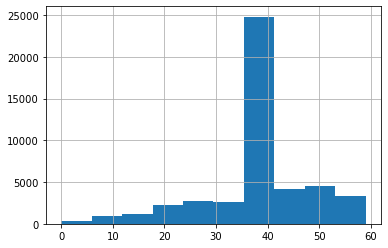

In [42]:
df['hours-per-week'].hist()

In [43]:
'''Pandas cut()
function is used to separate the array elements into different bins.

parameters used in this code: x: The input array to be binned,
bins: defines the number of bin or the  edges for the segmentation,
labels : (optional) specifies the labels for the returned bins.'''
#split the column into three bins(poorly efective, effective, heighly effective) using pandas.cut()
df1=df.copy()
df1['hours-per-week_des'] = pd.cut(x = df1['hours-per-week'], bins = 3, labels = ['poorly effective', 'effective', 'heighly effective'])

In [44]:
#count the objects in every bin.
df1['hours-per-week_des'].value_counts()

effective            30327
heighly effective    12365
poorly effective      4180
Name: hours-per-week_des, dtype: int64

In [45]:
#create a function (draw_barplot) to draw the barplot of each bin.
import matplotlib.pyplot as plt
def draw_barplot(x):
    s = x.value_counts()
    plt.bar(s.index, s.values)

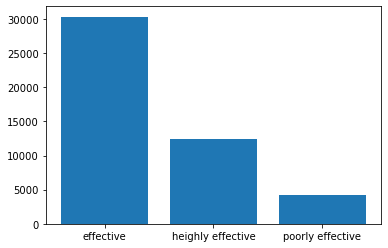

In [46]:
draw_barplot(df1['hours-per-week_des'])

In [47]:
#define the  edges for the segmentation.
df1['hours-per-week_des2'] = pd.cut(x = df1['hours-per-week'], bins = [0, 20, 55, 80], labels = ['poorly effective', 'effective', 'heighly effective'])

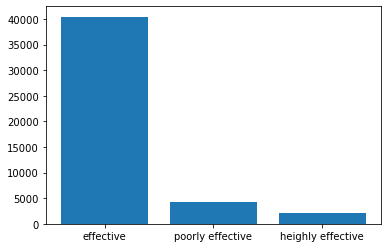

In [48]:
draw_barplot(df1['hours-per-week_des2'])

#### KBinsDiscretizer
The discretization transform is available in the scikit-learn Python machine learning library via the KBinsDiscretizer class.

Parameters: n_binsint or n_features: The number of bins to produce.

encode{‘onehot’, ‘onehot-dense’, ‘ordinal’}: Method used to encode the transformed result.

‘onehot’: Encode the transformed result with one-hot encoding and return a sparse matrix.

‘onehot-dense’: Encode the transformed result with one-hot encoding and return a dense array.

‘ordinal’: Return the bin identifier encoded as an integer value.

strategy{‘uniform’, ‘quantile’, ‘kmeans’}: Strategy used to define the widths of the bins.

‘uniform’: All bins in each feature have identical widths.

‘quantile’: All bins in each feature have the same number of points.

‘kmeans’: Values in each bin have the same nearest center of a 1D k-means cluster.


## Equal-Width Discretization
Separating all possible values into ‘N’ number of bins, each having the same width. Formula for interval width: Width = (maximum value - minimum value) / N

where N is the number of bins or intervals.

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

In [50]:
discretizer  = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

In [51]:
'''fit_transform() method:
Fit to data, then transform it.

Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

parameters: x: array-like of shape (n_samples, n_features) Input samples.'''

df1['hours-per-week_discrete'] = discretizer.fit_transform(df1['hours-per-week'].values.reshape(-1,1)).astype(int)

In [52]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income,hours-per-week_des,hours-per-week_des2,hours-per-week_discrete
0,8.0,3.0,18695.0,1.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,39.0,38.0,0.0,effective,effective,1
1,21.0,3.0,4067.0,8.0,4.0,2.0,4.0,0.0,4.0,1.0,0.0,49.0,38.0,0.0,heighly effective,effective,2
2,11.0,1.0,24454.0,4.0,7.0,2.0,10.0,0.0,4.0,1.0,0.0,39.0,38.0,1.0,effective,effective,1
3,27.0,3.0,10790.0,11.0,5.0,2.0,6.0,0.0,2.0,1.0,0.0,39.0,38.0,1.0,effective,effective,1
4,1.0,3.0,5207.0,11.0,5.0,4.0,9.0,3.0,4.0,0.0,0.0,29.0,38.0,0.0,effective,effective,1


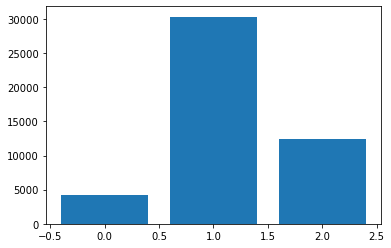

In [53]:
draw_barplot(df1['hours-per-week_discrete'])

In [54]:
discretizer.bin_edges_

array([array([ 0.        , 19.66666667, 39.33333333, 59.        ])],
      dtype=object)

## Equal frequency
Separating all possible values into ‘N’ number of bins, each having the same amount of observations. Intervals may correspond to quantile values. 

In [55]:
discretizer  = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

In [56]:
df1['hours-per-week_eq_freq'] = discretizer.fit_transform(df1['hours-per-week'].values.reshape(-1,1)).astype(int)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [57]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income,hours-per-week_des,hours-per-week_des2,hours-per-week_discrete,hours-per-week_eq_freq
0,8.0,3.0,18695.0,1.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,39.0,38.0,0.0,effective,effective,1,1
1,21.0,3.0,4067.0,8.0,4.0,2.0,4.0,0.0,4.0,1.0,0.0,49.0,38.0,0.0,heighly effective,effective,2,1
2,11.0,1.0,24454.0,4.0,7.0,2.0,10.0,0.0,4.0,1.0,0.0,39.0,38.0,1.0,effective,effective,1,1
3,27.0,3.0,10790.0,11.0,5.0,2.0,6.0,0.0,2.0,1.0,0.0,39.0,38.0,1.0,effective,effective,1,1
4,1.0,3.0,5207.0,11.0,5.0,4.0,9.0,3.0,4.0,0.0,0.0,29.0,38.0,0.0,effective,effective,1,0


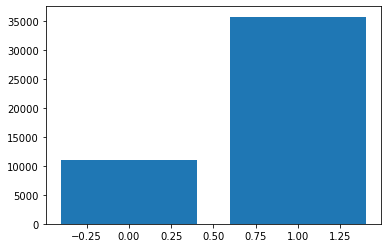

In [58]:
draw_barplot(df1['hours-per-week_eq_freq'])

In [59]:
discretizer.bin_edges_

array([array([ 0., 39., 59.])], dtype=object)

## K-Means Discretization
We apply K-Means clustering to the continuous variable, thus dividing it into discrete groups or clusters.

In [60]:
discretizer  = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [61]:
df1['hours-per-week_k'] = discretizer.fit_transform(df1['hours-per-week'].values.reshape(-1,1)).astype(int)

In [62]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income,hours-per-week_des,hours-per-week_des2,hours-per-week_discrete,hours-per-week_eq_freq,hours-per-week_k
0,8.0,3.0,18695.0,1.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,39.0,38.0,0.0,effective,effective,1,1,1
1,21.0,3.0,4067.0,8.0,4.0,2.0,4.0,0.0,4.0,1.0,0.0,49.0,38.0,0.0,heighly effective,effective,2,1,2
2,11.0,1.0,24454.0,4.0,7.0,2.0,10.0,0.0,4.0,1.0,0.0,39.0,38.0,1.0,effective,effective,1,1,1
3,27.0,3.0,10790.0,11.0,5.0,2.0,6.0,0.0,2.0,1.0,0.0,39.0,38.0,1.0,effective,effective,1,1,1
4,1.0,3.0,5207.0,11.0,5.0,4.0,9.0,3.0,4.0,0.0,0.0,29.0,38.0,0.0,effective,effective,1,0,1


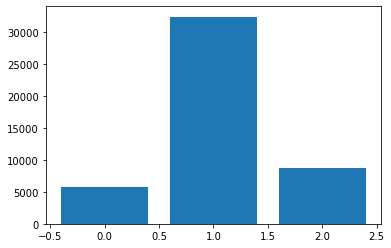

In [63]:
draw_barplot(df1['hours-per-week_k'])

In [64]:
discretizer.bin_edges_

array([array([ 0.        , 27.69253179, 45.29151268, 59.        ])],
      dtype=object)

In [65]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
0,8.0,3.0,18695.0,1.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,39.0,38.0,0.0
1,21.0,3.0,4067.0,8.0,4.0,2.0,4.0,0.0,4.0,1.0,0.0,49.0,38.0,0.0
2,11.0,1.0,24454.0,4.0,7.0,2.0,10.0,0.0,4.0,1.0,0.0,39.0,38.0,1.0
3,27.0,3.0,10790.0,11.0,5.0,2.0,6.0,0.0,2.0,1.0,0.0,39.0,38.0,1.0
4,1.0,3.0,5207.0,11.0,5.0,4.0,9.0,3.0,4.0,0.0,0.0,29.0,38.0,0.0


# Part 2

## supervised learning Algorithms:

## decision tree


In [66]:
from sklearn.model_selection import train_test_split
x = df.drop('income',axis=1)
y = df['income']
x.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country
0,8.0,3.0,18695.0,1.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,39.0,38.0
1,21.0,3.0,4067.0,8.0,4.0,2.0,4.0,0.0,4.0,1.0,0.0,49.0,38.0
2,11.0,1.0,24454.0,4.0,7.0,2.0,10.0,0.0,4.0,1.0,0.0,39.0,38.0
3,27.0,3.0,10790.0,11.0,5.0,2.0,6.0,0.0,2.0,1.0,0.0,39.0,38.0
4,1.0,3.0,5207.0,11.0,5.0,4.0,9.0,3.0,4.0,0.0,0.0,29.0,38.0


In [67]:
y.head(5)

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: income, dtype: float64

In [68]:
#here we divide x which contains all the data except for the income to training set and test set and the same for y and then 
#give the test set the size of 20% which means that the training set is 80% obvisoly
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
x_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country
48308,29.0,1.0,8823.0,9.0,9.0,0.0,9.0,1.0,4.0,0.0,0.0,54.0,38.0
10397,52.0,5.0,6821.0,4.0,7.0,2.0,11.0,0.0,4.0,1.0,0.0,14.0,38.0
15057,20.0,3.0,8372.0,11.0,5.0,0.0,7.0,4.0,4.0,0.0,0.0,55.0,38.0
37730,17.0,3.0,11017.0,8.0,4.0,2.0,0.0,5.0,4.0,0.0,0.0,19.0,38.0
23508,36.0,3.0,11560.0,8.0,4.0,6.0,6.0,1.0,2.0,0.0,0.0,39.0,38.0


In [69]:
#here we import decision tree classifier from the tree of the sklearn which will create our tree
from sklearn.tree import DecisionTreeClassifier
#we make an object of the decision tree classifier and giving it the maximum depth of 5 
tree1 = DecisionTreeClassifier(max_depth = 5)
tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [70]:
#then we make our predictions
y_predict = tree1.predict(x_test)

#then we evaluate the the accuracy of our model by importing sklearn metrices
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.8218666666666666


In [71]:
#then we find our accuracy to be 82.76%
#then we will put our features in a list to use the in the feature_names parameter
features = list(df.columns[1:])
features

['workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'hours-per-week',
 'native-country',
 'income']

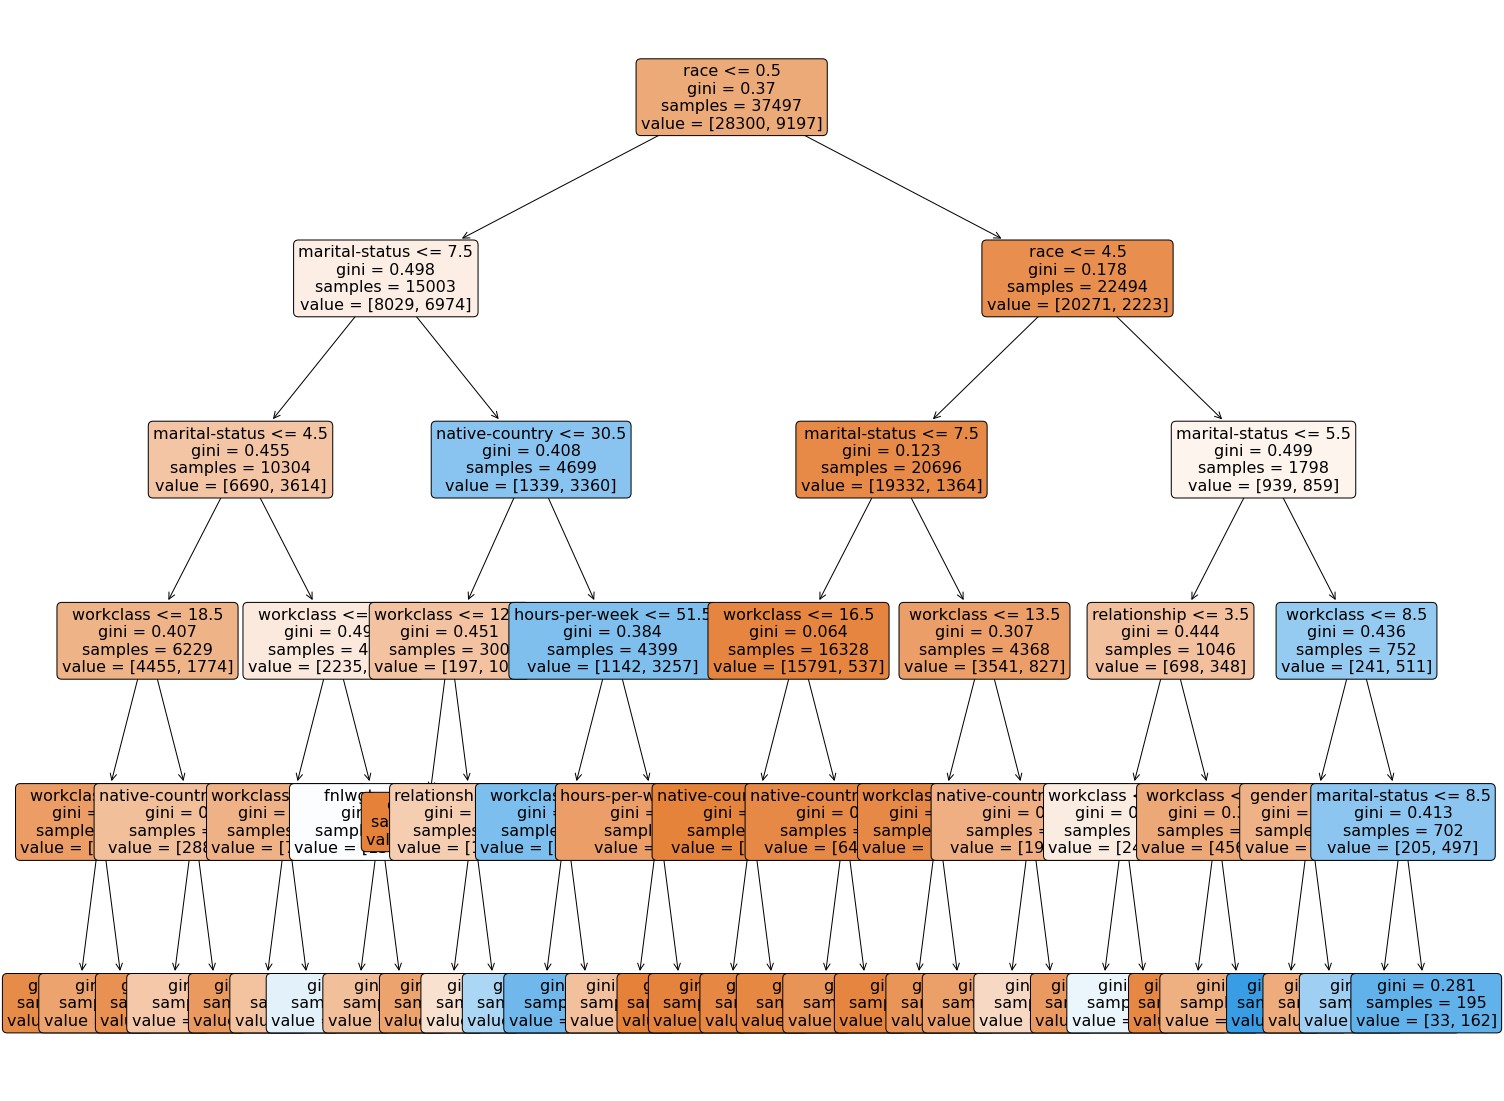

In [72]:
#then we here import plot_tree which will vizualize our tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
#we here give the plot_tree our tree , feature names, and giving fiilled parameter the TRUE value meaning painting nodes to indicate majority class for classification
#rounded set for TRUE  for drawing node boxes with rounded corners and 
#use Helvetica fonts instead of Times-Roman which is a specific type of font.
plot = plot_tree(tree1,feature_names = features,
                filled = True,
                rounded = True,
                fontsize = 16)

In [73]:
fig.savefig("decistion_tree.png")

# KNN


In [74]:
#here we use our training an test sets again but this time on a different classification technique which is k-nearest neighbors
#here we import the knearest neighbors classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
#we create instance from the knn classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
#fitting our model to the training data
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [75]:
y_predict2 = knn.predict(x_test)
y_predict2

array([0., 0., 1., ..., 0., 0., 0.])

In [76]:
print(accuracy_score(y_test,y_predict2))

0.72992


In [77]:
#we find that our accuracy is 74.368%

# Naive Bayes 

We can explore the possibility in predicting income level based on the individual's personal information

Gaussian Naive Bayes: It works with continuous attributes, it assumes the data normally distributed (Gaussian Distribution)

In [81]:
#import gaussian naive bayess model
from sklearn.naive_bayes import GaussianNB

# create a gaussian classifier
model = GaussianNB()

# train the model using the training sets
model.fit(x_train,y_train)

GaussianNB()

In [82]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

## accuracy

In [80]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7835


we find that our accuracy is 78.27%

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'SepalLengthCm')

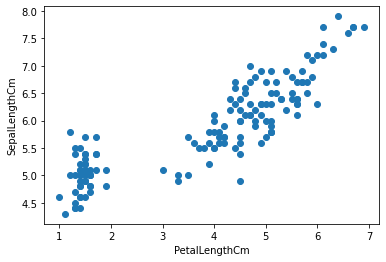

In [3]:
plt.scatter(df.PetalLengthCm,df['SepalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')

In [4]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['PetalLengthCm','SepalLengthCm']])
y_predicted 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 3, 1, 3, 3, 0, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1])

In [5]:
df['cluster']=y_predicted
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [6]:
km.cluster_centers_ 

array([[3.96071429, 5.53214286],
       [4.94      , 6.292     ],
       [1.464     , 5.006     ],
       [6.03181818, 7.12272727]])

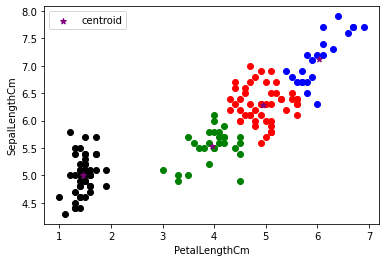

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.PetalLengthCm,df1['SepalLengthCm'],color='green')
plt.scatter(df2.PetalLengthCm,df2['SepalLengthCm'],color='red')
plt.scatter(df3.PetalLengthCm,df3['SepalLengthCm'],color='black')
plt.scatter(df4.PetalLengthCm,df4['SepalLengthCm'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.legend() 

Preprocessing using min max scaler

In [9]:
#To round the ratios of numbers 

scaler = MinMaxScaler()

scaler.fit(df[['SepalLengthCm']]) 
df['SepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,0.222222,3.5,0.067797,0.2,Iris-setosa,2
1,2,0.166667,3.0,0.067797,0.2,Iris-setosa,2
2,3,0.111111,3.2,0.050847,0.2,Iris-setosa,2
3,4,0.083333,3.1,0.084746,0.2,Iris-setosa,2
4,5,0.194444,3.6,0.067797,0.2,Iris-setosa,2


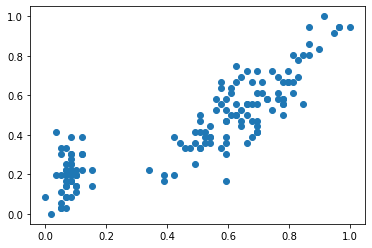

In [10]:
plt.scatter(df.PetalLengthCm,df['SepalLengthCm'])

In [11]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['PetalLengthCm','SepalLengthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2,
       0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [12]:
df['cluster']=y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,0.222222,3.5,0.067797,0.2,Iris-setosa,1
1,2,0.166667,3.0,0.067797,0.2,Iris-setosa,1
2,3,0.111111,3.2,0.050847,0.2,Iris-setosa,1
3,4,0.083333,3.1,0.084746,0.2,Iris-setosa,1
4,5,0.194444,3.6,0.067797,0.2,Iris-setosa,1


In [13]:
km.cluster_centers_

array([[0.68583535, 0.57440476],
       [0.07864407, 0.19611111],
       [0.88619855, 0.85714286],
       [0.51299435, 0.34444444]])

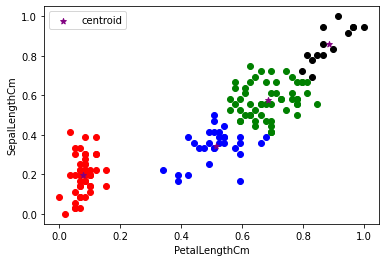

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.PetalLengthCm,df1['SepalLengthCm'],color='green')
plt.scatter(df2.PetalLengthCm,df2['SepalLengthCm'],color='red')
plt.scatter(df3.PetalLengthCm,df3['SepalLengthCm'],color='black')
plt.scatter(df4.PetalLengthCm,df4['SepalLengthCm'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.legend()

 Elbow Plot

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


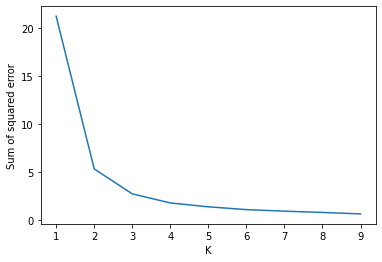

In [15]:
# to show what is the appropriate number of k for the data 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','SepalLengthCm']])
    sse.append(km.inertia_) # to show mean square error 
    plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse) 